In [1]:
import numpy as np
import pandas as pd

In [2]:
! pip install kagglehub

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1


In [4]:
df = pd.read_csv("/home/codespace/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1/data.csv")

In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.columns 

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

### 2. Exploratory Data Analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(20* "*")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
********************
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
********************
year
[2011 2012 2013 1992 1993]
********************
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
********************
engine_hp
[335. 300. 230. 320. 172.]
********************
engine_cylinders
[ 6.  4.  5.  8. 12.]
********************
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
********************
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
********************
number_of_doors
[ 2.  4.  3. nan]
********************
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
********************
vehicle_size
['compact' 'midsize' 'large']
********************
vehicle_style
['coupe'

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# last line is needed for plots to be displayed on the book

<Axes: xlabel='msrp', ylabel='Count'>

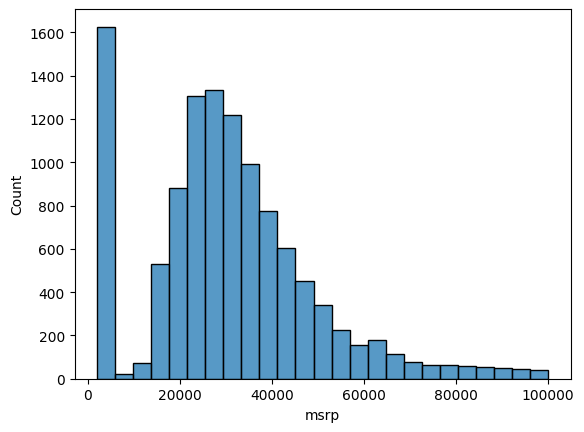

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 25)

In [13]:
# adds 1 in case of 0 presence in the dataset 
np.log1p([0, 5])

array([0.        , 1.79175947])

In [14]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

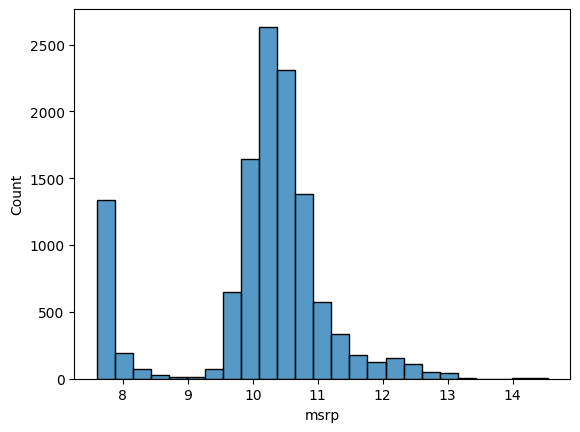

In [15]:
sns.histplot(price_logs, bins = 25)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
n = len(df)

n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

In [18]:
n_val, n_test, n_train, n

(2382, 2382, 7150, 11914)

In [19]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [23]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [24]:
len(y_train)

7150

### Regression

In [25]:
xi = [453, 11, 86]

In [26]:
w0 = 7.07 # bayes term (our prediction when we don't know anything about the car.
w = [0.01, 0.04, 0.002] # weights

In [27]:
def linear_regression(xi):
    n = len (xi)
    
    pred = w0 

    for j in range(n):
        pred = pred + w[j] * xi[j]
        # j is 0: pred = 0 + 1 + 453. so pred is 454
    return pred

In [28]:
linear_regression(xi)

12.212000000000002

In [29]:
np.exp(linear_regression(xi)) - 1 

np.float64(201187.99119899498)

### Linear Regression vector form

In [30]:
def dot (xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [31]:
dot(xi, w)

5.142

In [32]:
def linear_regression(xi):
    return w0 + dot(xi, w)

Shorter version of lin reg function

In [33]:
w_new = [w0] + w

In [34]:
w_new

[7.07, 0.01, 0.04, 0.002]

In [35]:
# This works because we insert w0 (7.07) and 1 into xi
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [36]:
linear_regression(xi)

12.212000000000002

### Apply it using more observations with matrix-vector multiplication

In [37]:
w0 = 7.07 # bayes term (our prediction when we don't know anything about the car.
w = [0.01, 0.04, 0.002] # weights
w_new = [w0] + w

In [38]:
x1 =  [1, 148, 24, 1385]
x2 =  [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [39]:
def linear_regression(X):
    return X.dot(w_new)

In [40]:
linear_regression(X)

array([12.28 , 13.452, 12.212])

### Training a linear regression model

In [41]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]  
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [42]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

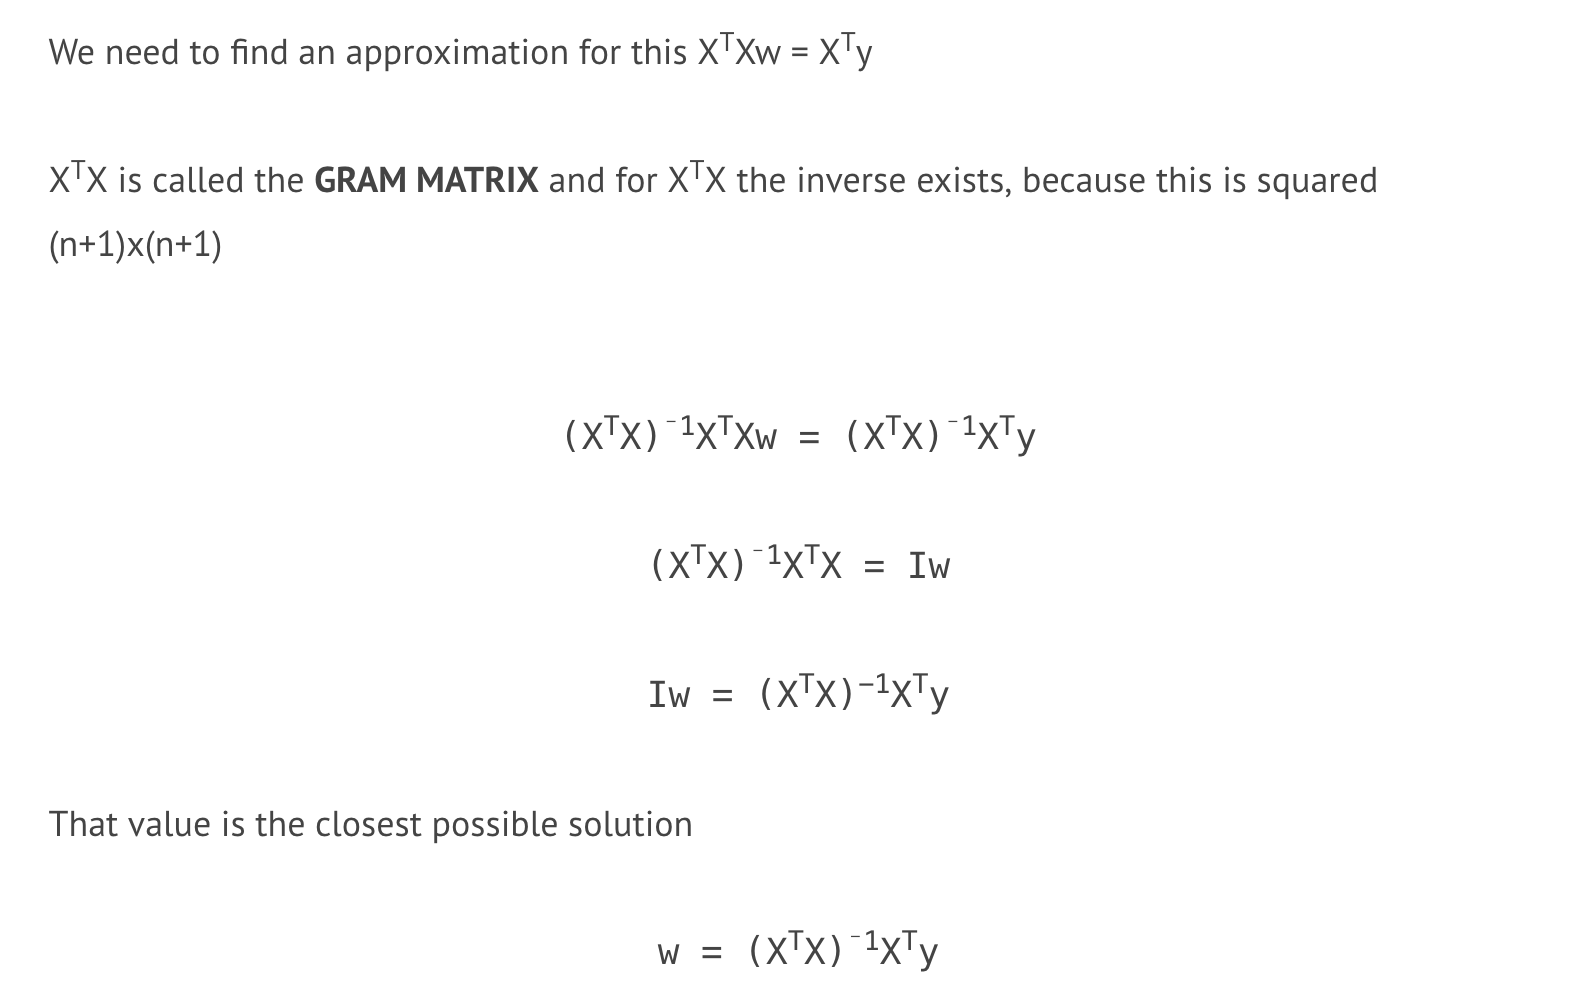

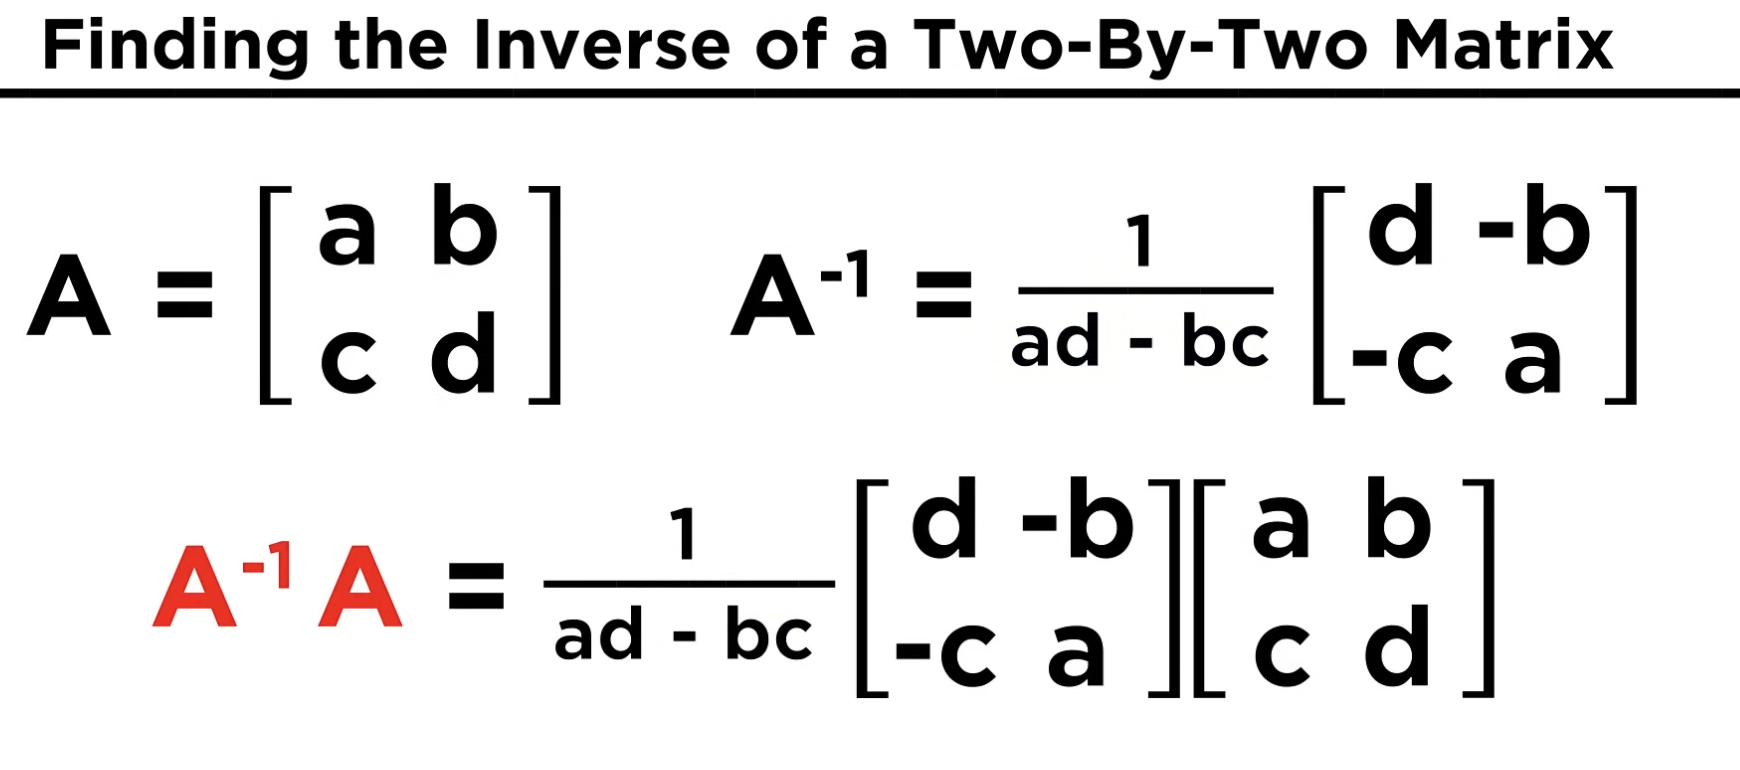

In [43]:
def train_linear_regression(X, y):
    # STEP 1: Add bias column
    # Without this, our line must pass through origin (0,0)
    # With it, line can have any y-intercept
    # Example: X = [[148, 24], [132, 25]] becomes [[1, 148, 24], [1, 132, 25]]
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # STEP 2: Compute X^T X (Gram matrix)
    # If X is (9 samples, 4 features), then:
    #   X.T is (4, 9) and X is (9, 4)
    #   X.T.dot(X) gives (4, 4) - a square matrix we can invert
    # This "squares up" our rectangular data so we can solve the equation
    XTX = X.T.dot(X)
    
    # STEP 3: Invert the Gram matrix
    # Like division: if 3x = 6, then x = 6/3
    # For matrices: if XTX * w = something, we need XTX_inv to isolate w
    # Fails if columns are duplicated or linearly dependent (singular matrix error)
    XTX_inv = np.linalg.inv(XTX)
    
    # STEP 4: Apply normal equation w = (X^T X)^(-1) X^T y
    # This finds weights that minimize squared prediction errors
    # Example result: [150.2, 0.5, -2.1, 0.03] means:
    #   prediction = 150.2 + 0.5*feature1 - 2.1*feature2 + 0.03*feature3
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # STEP 5: Split intercept from feature weights
    w0 = w_full[0]   # Intercept: baseline prediction when all features = 0
    w = w_full[1:]   # Slopes: how much each feature changes the prediction
    return w0, w

In [44]:
train_linear_regression(X, y)

(np.float64(300.06776692555627),
 array([-0.22774253, -2.5769413 , -0.02301206]))

### Car Price Baseline Model

In [45]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [46]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [47]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [48]:
X_train = df_train[base].fillna(0).values

In [49]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [50]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [51]:
w0, w = train_linear_regression(X_train, y_train)

In [52]:
# make predictions
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

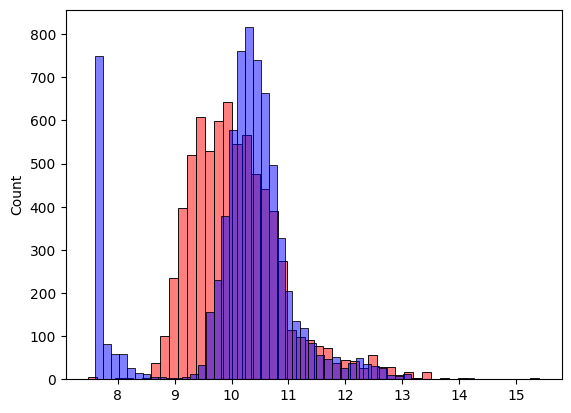

In [53]:
sns.histplot(y_pred, color='red', bins = 50, alpha=0.5)
sns.histplot(y_train, color='blue', bins = 50, alpha=0.5)

### Root Mean Squared Error

In [54]:
def rmse(y, y_pred):
    '''return root mean squared error'''
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [55]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validating the model

In [56]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [57]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7616530991301627)

### Feature Engineering

In [58]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    feature = base + ['age']
    df_num = df[feature]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

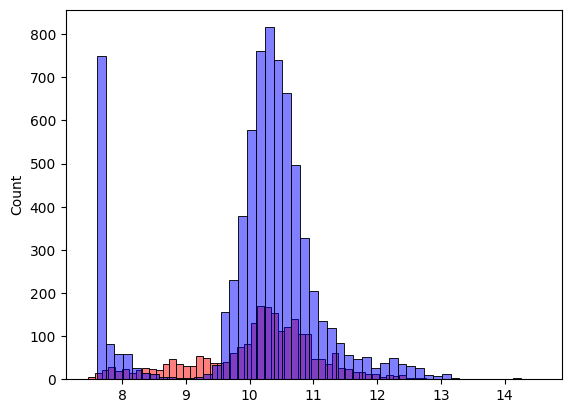

In [60]:
sns.histplot(y_pred, color='red', bins = 50, alpha=0.5)
sns.histplot(y_train, color='blue', bins = 50, alpha=0.5)

### Categorical Variables

In [61]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    # prepare the categorical variables
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5157995641501902)

In [63]:
# car makers
make = list(df.make.value_counts().head().index)
# Note: we use .head to get the most popular ones. Using all of them messed up the model. Also, this part is outside the prepare_X func
# because it results in different shapes.

In [64]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    # prepare the categorical variables
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in make:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [65]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5076038849556633)

In [66]:
categorical_variables = ['transmission_type', 'driven_wheels', 'make', 
                         'engine_fuel_type', 'market_category', 'vehicle_style', 'transmission_type']

In [67]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [68]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    # prepare the categorical variables
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [69]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(68.93140450247886)

### Regularization

Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns the training data too well, including its noise and outliers, and performs poorly on new, unseen data. Regularization helps create models that generalize better to new data by adding a penalty to the loss function (the function the model tries to minimize during training), which keeps the model’s parameters (like weights in a neural network) smaller and simpler.

In [70]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    
    w0 = w_full[0]   
    w = w_full[1:]
    return w0, w

In [71]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4580084515825782)

### Tuning

In [72]:
for r in [0.00001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f"r is: {r} and score is: {score}.")
# 0.001 is the sweet spot for regularization        

r is: 1e-05 and score is: 0.4580077583308475.
r is: 0.001 and score is: 0.4580084515825782.
r is: 0.01 and score is: 0.45801482579555125.
r is: 0.1 and score is: 0.45808141226224974.
r is: 1 and score is: 0.4589480514392133.
r is: 10 and score is: 0.47461646488299436.


### Full Training

In [73]:
df_full_train = pd.concat([df_train, df_val])

In [74]:
df_full_train =  df_full_train.reset_index(drop=True)

In [75]:
X_full_train = prepare_X(df_full_train)

In [76]:
y_full_train = np.concatenate([y_train, y_val])

In [77]:
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [78]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.45455478961477197)

### Make Prediction

In [79]:
car = df_test.iloc[20]
df_small = pd.DataFrame([car])
df_small = prepare_X(df_small)
y_pred = w0 + df_small.dot(w)
y_pred

array([10.51034962])

In [80]:
np.expm1(y_pred)

array([36692.30588416])

In [81]:
car

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

In [82]:
df[(df['make']== 'toyota') & (df['model']== 'sienna') & (df['driven_wheels']== 'front_wheel_drive')].head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9205,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031,37445
